# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(adultDataSet_filename)  # For census data
#df = pd.read_csv(airbnbDataSet_filename)  # For Airbnb NYC listings data
#df = pd.read_csv(WHRDataSet_filename)     # For World Happiness Report data
#df = pd.read_csv(bookReviewDataSet_filename)  # For book reviews data

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. **List the data set you have chosen:**

   - `adultDataSet_filename`

2. **What will you be predicting? What is the label?**

   - We are predicting whether an individual earns more than $50,000 annually based on their personal and employment characteristics. The label for this prediction is `income_binary`.

3. **Is this a supervised or unsupervised learning problem? Is this a clustering, classification, or regression problem? Is it a binary classification or multi-class classification problem?**

   - This is a **supervised learning** problem. Specifically, it is a **classification** problem. Since the label `income_binary` indicates whether an individual earns more than $50,000 annually (with two possible outcomes: yes or no), it is a **binary classification** problem.

4. **What are your features? (Note: this list may change after you explore your data.)**

   - **Numerical Features:**
     - `age`
     - `education-num`
     - `capital-gain`
     - `capital-loss`
     - `hours-per-week`
   
   - **Categorical Features:**
     - `workclass`
     - `marital-status`
     - `occupation`
     - `relationship`
     - `race`
     - `sex_selfID`
     - `native-country`

5. **Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?**
    -Figuring out if someone makes more than $50,000 a year based on their personal and job details is really important for businesses. It helps them craft marketing strategies and offers that fit different income groups. For example, companies can pitch premium products to high-income customers and budget-friendly options to others. Financial institutions can better assess credit risk and offer tailored financial products. By understanding income distribution, businesses can better segment their markets, allocate resources more effectively, and make smarter strategic choices. It also plays a role in social initiatives by helping target support where it’s needed and guiding economic development. For instance, e-commerce businesses can use income predictions to customize promotions, insurance companies can create personalized plans, and retailers can stock products that match local income levels. Overall, predicting income helps businesses fine-tune their strategies, enhance their financial services, and make a positive social impact, leading to growth and better efficiency.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education-num  capital-g

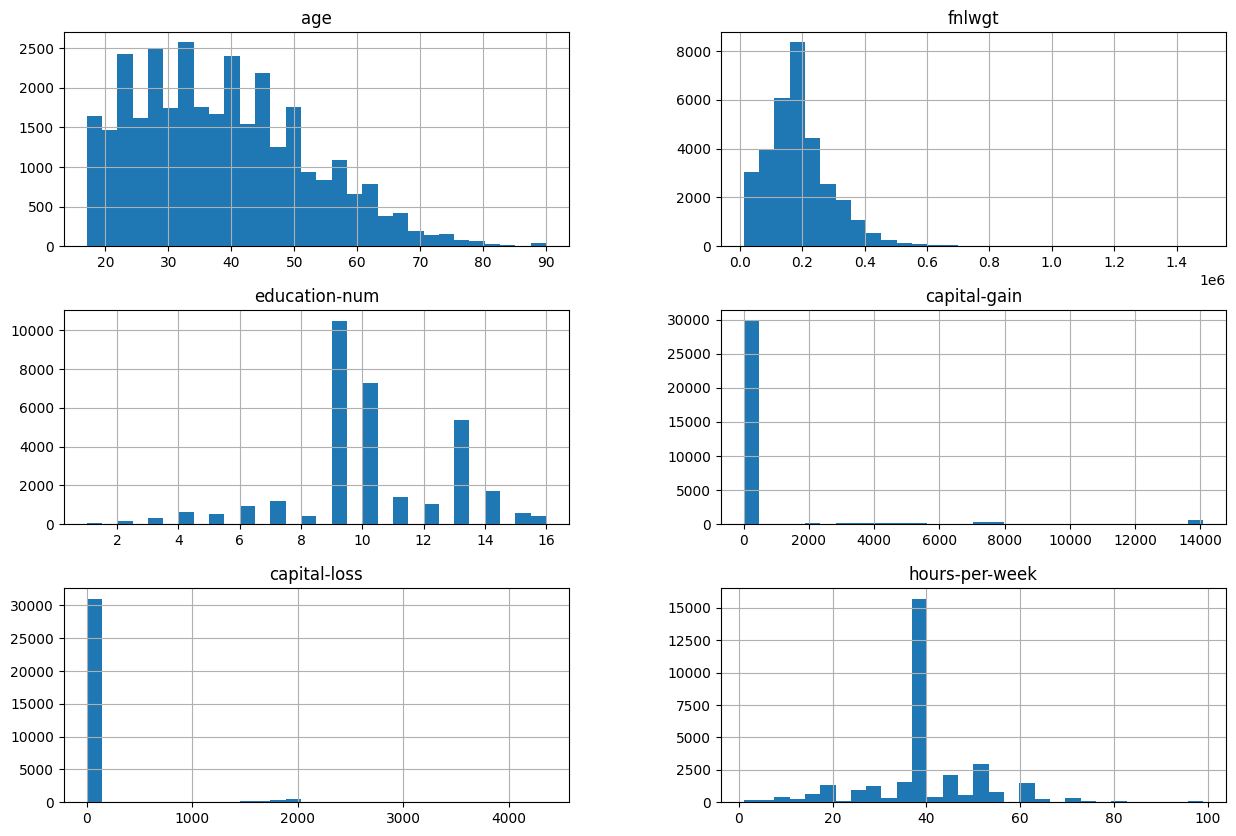

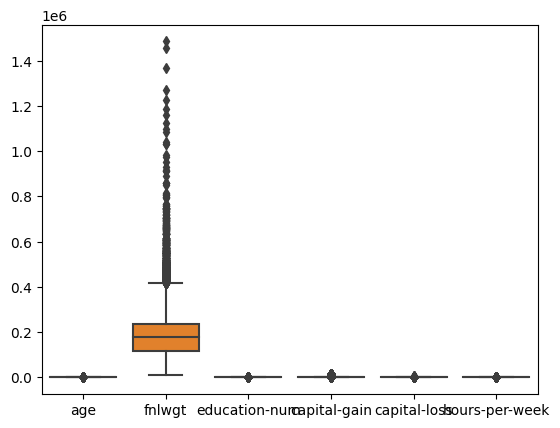

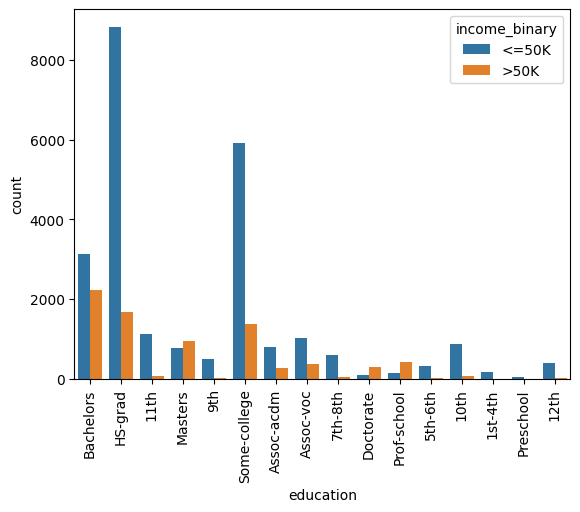

    age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  39.0   77516             13          2174             0            40.0   
1  50.0   83311             13             0             0            13.0   
2  38.0  215646              9             0             0            40.0   
3  53.0  234721              7             0             0            40.0   
4  28.0  338409             13             0             0            40.0   

  income_binary  workclass_Federal-gov  workclass_Local-gov  \
0         <=50K                      0                    0   
1         <=50K                      0                    0   
2         <=50K                      0                    0   
3         <=50K                      0                    0   
4         <=50K                      0                    0   

   workclass_Never-worked  ...  native-country_Portugal  \
0                       0  ...                        0   
1                       0  ...    

In [3]:
# Inspect the data
print(df.info())
print(df.describe())
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Check class distribution
print("Class distribution:\n", df['income_binary'].value_counts())

# Plot histograms for numerical features
df.hist(figsize=(15, 10), bins=30)
plt.show()

# Plot boxplots to detect outliers
sns.boxplot(data=df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
plt.show()

# Visualize the relationship between features and the target variable
sns.countplot(x='education', hue='income_binary', data=df)
plt.xticks(rotation=90)
plt.show()

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country'])

# Check the updated DataFrame
print(df_encoded.head())


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

**1. Feature List:**

After taking a close look at the data and exploring it, here's what I’ve decided for our features:

**Features to Keep:**

- Age
- Education level (education-num)
- Capital gains
- Capital losses
- Hours worked per week

**Binary Categorical Features:**

- Work class
- Marital status
- Occupation
- Relationship
- Race
- Self-identified sex
- Native country

**Features to Remove:**

- Final weight (fnlwgt)
- Education (since it’s already captured by education-num)

**2. Data Preparation Techniques:**

**Handling Missing Values:**

- For numerical columns with missing data, fill in the missing values with the median of the column.
- For categorical columns, use the most common value to fill in any gaps.

**Feature Encoding:**

- Convert categorical features into numerical format using one-hot encoding with `pd.get_dummies()`.

**Feature Scaling:**

- Standardize numerical features like age, capital gains, capital losses, and hours worked per week to make sure they all contribute equally to the model.

**Outlier Detection and Handling:**

- Identify outliers using boxplots and decide whether to cap or remove extreme values based on their distribution and impact on the model.

**Train-Test Split:**

- Split the data into training and testing sets, using 80% for training and 20% for testing.

**3. Models to Use:**

We'll be working with Logistic Regression and Random Forest.

**4. Model Training, Evaluation, and Improvement Plan:**

**Model Building:**

- Train various models on the training data to evaluate their performance and avoid overfitting.

**Model Evaluation:**

- Assess models using the test data with the following metrics:
  - **Accuracy:** How many predictions were correct.
  - **Precision:** The proportion of true positives among predicted positives.
  - **Recall:** The proportion of true positives among actual positives.
  - **F1 Score:** The balance between precision and recall.
  - **ROC-AUC:** How well the model distinguishes between classes.

**Hyperparameter Tuning:**

- Use Grid Search or Random Search to find the best settings for models like Random Forest and Gradient Boosting.

**Handling Class Imbalance:**

- If there’s a significant imbalance between classes, consider using class weighting techniques.

**Ensemble Methods:**

- Improve performance by combining models with methods like Voting or Stacking.

**5. Model Validation and Selection:**

**Validation:**

- Use cross-validation to compare how well different models perform.

**Final Evaluation:**

- Test the chosen model on the test set to confirm its performance and generalizability.

**Deploy and Monitor:**

- Once we have the final model, we’ll deploy it and keep an eye on its performance in the notebook.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

***Please note this code block may take a bit to compete its run:***

In [5]:
# Drop irrelevant columns
df = df.drop(columns=['fnlwgt', 'education'])

# Handle missing values
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']

# Separate features and target
X = df[numerical_features + categorical_features]
y = df['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)

# Handling missing values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create models
log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier())])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Logistic Regression model
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_log_reg))
print("ROC AUC:", roc_auc_score(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Train and evaluate Random Forest model
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Optional: Hyperparameter tuning with GridSearchCV for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

# Re-evaluate the best Random Forest model
best_rf_clf = grid_search.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test)
print("Optimized Random Forest Performance")
print(classification_report(y_test, y_pred_best_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))



Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.61      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

ROC AUC: 0.7712252710692924
Accuracy: 0.8544449562413634
Random Forest Performance
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4942
           1       0.72      0.63      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513

ROC AUC: 0.7763511861720722
Accuracy: 0.8516812528788577
Best parameters found: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Best score found: 0.8628304621154366
Optimized Random Forest Performance
              p